<a href="https://colab.research.google.com/github/ManahilKashif/AI201/blob/main/project_01_hello_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install -q langchain_google_genai

In [24]:
!pip install -q transformers diffusers accelerate

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.tools import Tool
import openai


In [26]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [27]:
first_prompt = PromptTemplate (
    input_variables =["question"],
  template = "change this {question} into  a good image generative prompt"
)

second_prompt = PromptTemplate (
    input_variables =["first_response"],
  template = "read this {first_response} and summarize into two lines promt for image generation ?")




In [28]:
llm = ChatGoogleGenerativeAI (
    api_key= GEMINI_API_KEY,
    model ="gemini-2.0-flash-exp",
    temperature= 0.8,
    token= 100
)

In [29]:
first_chain = first_prompt | llm
second_chain = second_prompt |llm

In [30]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusion3Pipeline

In [36]:
# Chain processing logic
first_response = first_chain.invoke({"question": input("write an image generation prompt: ")})
print("First Chain:", first_response.content)

second_response = second_chain.invoke({"first_response": first_response.content})
print("Second Chain:", second_response.content)

# Use the processed prompt from the second chain for image generation
prompt = second_response.content

# Load the pre-trained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

# Generate the image
print("Generating image with prompt:", prompt)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

# Save and display the image
image.save("output_image.png")
image.show()
print("Image saved as 'output_image.png'")


write an image generation prompt: flower
First Chain: Okay, let's transform "a flower" into a good image generative prompt.  Here's how we can make it better, along with explanations:

**The Problem with "a flower":**

"A flower" is incredibly vague.  Image generators are powerful, but they need specifics to create something compelling. It could be *any* flower, in any style, under any lighting.

**Elements of a Good Image Generation Prompt:**

To make "a flower" into a good prompt, we need to consider these factors:

*   **Subject:** What kind of flower? (Rose, sunflower, daisy, etc.)
*   **Color:** What colors are we looking for?
*   **Style:**  Realistic? Impressionistic? Cartoonish? Stylized?
*   **Composition:** Where is the flower in the image? Is it a close-up, a field, in a vase?
*   **Lighting:** What kind of lighting do we want? (Golden hour, studio lighting, dramatic, etc.)
*   **Background:** What should be behind the flower?
*   **Details:** Are there any special details w

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image with prompt: Okay, here's a two-line summary of the provided text, focusing on creating effective image generation prompts:

**To get good image results, move beyond vague terms like "a flower." Instead, specify flower type, color, style, composition, lighting, background, details, and mood in your prompts.**


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'output_image.png'


<class 'langchain_core.messages.ai.AIMessage'>


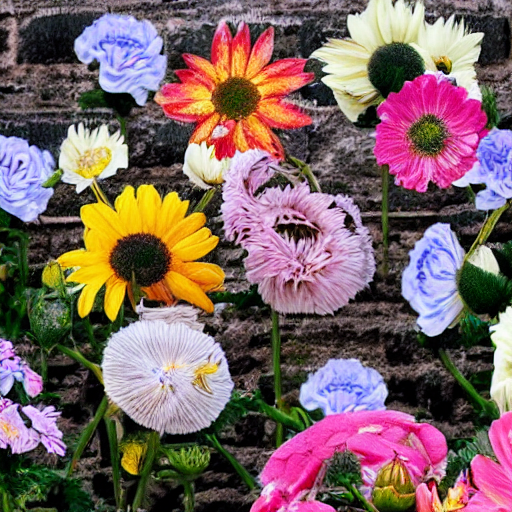

In [37]:
print(type(first_response))
image